<a href="https://colab.research.google.com/github/dctec/mlc/blob/master/week2/StockPrediction/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF RUNNING IN GOOGLE COLAB {

## HOUSEKEEPING FIRST

In [ ]:
# Mount Google Drive to /content/drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
# If project directory does not exist. Run this first (one time only)
%mkdir -p "/content/drive/My Drive/mlc/week2"
%cd "/content/drive/My Drive/mlc/week2"
%mkdir "sample_data"

In [ ]:
# Once the project and sample data directory exist. Change directory
%cd "/content/drive/My Drive/mlc/week2"
%pwd

# } END IF

# IF RUNNING LOCAL WITH ANACONDA {

## Make sure libraries are installed

In [ ]:
!conda install -y pandas==0.24.2 matplotlib==3.1.0 pandas-datareader==0.7.0 scikit-learn seaborn

# } END IF

# BEGIN

### The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

** STEP 1 **
- Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL 

** Step 1 ** - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

** Step 2 ** - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

** Step 3 ** - Visualize your result using matplotlib or another plotting library of your choice

## -

In [1]:
import sys
print(sys.version)

import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

%matplotlib inline
# register matplotlib_converters 
# and avoid getting the warning on Pandas
pd.plotting.register_matplotlib_converters


3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


<function pandas.plotting._converter.register(explicit=True)>

## Fetch new data and save to .csv if needed {

In [ ]:
# Pull data from Yahoo for the Stock and dates desired.
## set index=True when saving the CSB file so that
## the Date field is included and not just some
## incremental index key.
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 1)
# end = datetime.date.today()

import pandas_datareader.data as web

df = web.DataReader("IBM", 'yahoo', start, end)
df.tail()
df.to_csv('sample_data/IBM_index.csv',index=True)

## };

## Read CSV data {

In [2]:
# Read the data from the CSV and check a few rows
#df = pd.read_csv('sample_data/IBM_index.csv',parse_dates=['Date'])
df = pd.read_csv("sample_data/IBM_index.csv",parse_dates=['Date'],index_col=['Date'])
df.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-29,135.690002,134.039993,134.179993,134.880005,2971800.0,134.880005
2019-08-30,136.070007,134.360001,135.580002,135.529999,2960600.0,135.529999


In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df['Adj Close'].tail(5).values

In [ ]:
df['Adj Close'].tail(5).values.reshape(-1,1)

## };

# PLOT 'ADJ CLOSE' value

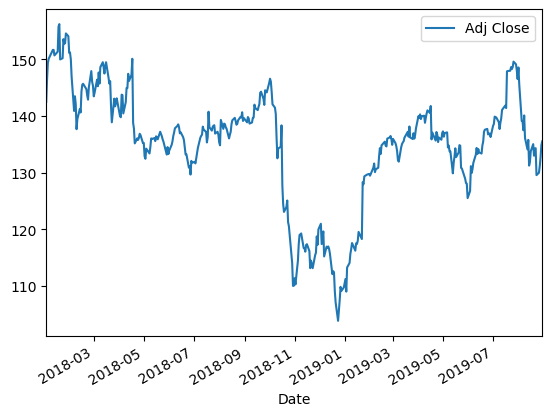

In [3]:
# Plotting Adjusted Close price data with DATE on X axis
style.use('default')
df['Adj Close'].plot(label='Adj Close')
plt.legend()

# PLOT MOVING AVERAGE

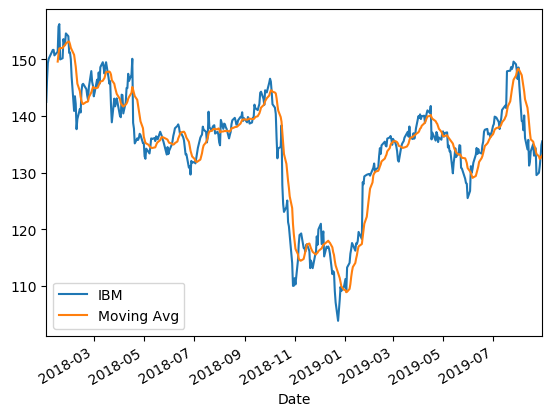

In [5]:
#Find the rolling mean of the stock
close_px = df['Adj Close']
mavg = close_px.rolling(window=10).mean()

close_px.plot(label='IBM')
mavg.plot(label='Moving Avg')
plt.legend()

# LINEAR REGRESSION (LEAST SQUARES)

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Convert into numpy array (.values) of 1 column (.reshape(-1,1))
# (-1,1): -1 means that calculate the dimension of rows, but have 1 column
Xdate=df.index.values.reshape(-1,1) #datetime object

# Numpy will require all array types to be the same for the split
# They can be casted to a common type but datetime type cannot be casted
# So, generate a numerical representation of the dates as offsets. Starting at
# one, increment by one each day of the week. Weekends included. And 
# since no weekends are available on the stock pricing dataset, then there
# is a skip of 2 (1,2,3,4,5,8,9,10,11,12,15..)
Xnum=df.index.map(datetime.datetime.toordinal).values.reshape(-1,1) #int64 object
Y=df.loc[:,['Adj Close']].values.reshape(-1,1) #float object

# 80/20% split data for train and test. In order (no shuffle)
X_train, X_test, Y_train, Y_test = train_test_split(Xnum,Y,test_size=0.2, shuffle=False, random_state=0)

# Instantiate the LinearRegression class to create the regression object
regressor=linear_model.LinearRegression()
#  call the .fit method to trace the curve and find the parameters
regressor.fit(X_train,Y_train)

# Do prediction with previous curve fitting for both, train and test data
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)


# Explained variance score: 1 is perfect prediction
print("<<FITTED VALUES>>\n\tcoefficient: %.2f" % regressor.coef_ , "\tintercept: %.2f" % regressor.intercept_,
     "\n\tscore=%.2f" % regressor.score(X_test,Y_test),"\t\tMean Sq Error (RMSD)= %.2f" % mean_squared_error(Y_test, Y_pred_test))

# coefficient (-0.04150802) means a scalar of 4%
# intercept (30723.6129359) means a zero crossing of the X axis at that point 

<<FITTED VALUES>>
	coefficient: -0.04 	intercept: 30723.61 
	score=-6.47 		Mean Sq Error (RMSD)= 250.68


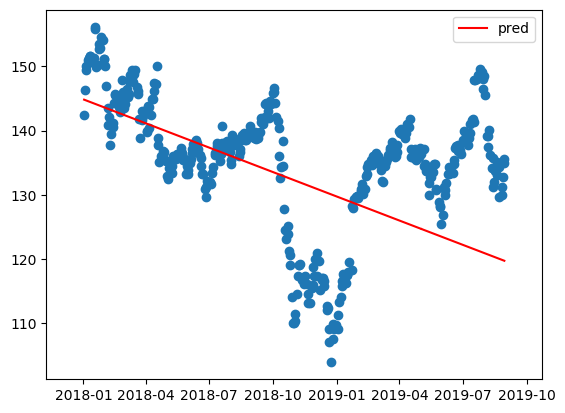

In [21]:
plt.scatter(Xdate,Y)
plt.plot(X_test, Y_pred_test, color='red')
plt.plot(X_train, Y_pred_train, color='red',label="pred")
plt.legend()